In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import PIL
import matplotlib.pyplot as plt
import json
from IPython.display import Image as disp_image 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data_dir = '/content/drive/My Drive/DR_Messidor_Dataset'
img_height = 256
img_width = 256
batch_size = 32
channels = 3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width), 
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

In [ ]:
model = tf.keras.applications.ResNet50V2(weights = "imagenet", include_top=False, 
input_shape = (img_width, img_height, channels))

In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

top_model = Sequential()
top_model.add(model)
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

print(model.summary())
print(top_model.summary())

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
top_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),
                  metrics=METRICS)

history = top_model.fit(
          train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=18,
          validation_data=validation_generator,
          validation_steps=validation_generator.n // batch_size)

Epoch 1/18
 80/180 [============>.................] - ETA: 5:49 - loss: 0.1481 - accuracy: 0.9742 - precision: 0.9719 - recall: 0.9792 - auc: 0.9888

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


180/180 [==============================] - 754s 4s/step - loss: 0.1018 - accuracy: 0.9842 - precision: 0.9830 - recall: 0.9872 - auc: 0.9932 - val_loss: 0.0806 - val_accuracy: 0.9896 - val_precision: 0.9908 - val_recall: 0.9895 - val_auc: 0.9949
Epoch 2/18
180/180 [==============================] - 154s 854ms/step - loss: 0.0646 - accuracy: 0.9929 - precision: 0.9928 - recall: 0.9938 - auc: 0.9955 - val_loss: 0.1323 - val_accuracy: 0.9896 - val_precision: 0.9934 - val_recall: 0.9869 - val_auc: 0.9937
Epoch 3/18
180/180 [==============================] - 155s 862ms/step - loss: 0.0281 - accuracy: 0.9965 - precision: 0.9970 - recall: 0.9964 - auc: 0.9983 - val_loss: 0.1335 - val_accuracy: 0.9910 - val_precision: 0.9870 - val_recall: 0.9961 - val_auc: 0.9913
Epoch 4/18
180/180 [==============================] - 153s 851ms/step - loss: 0.0095 - accuracy: 0.9984 - precision: 0.9980 - recall: 0.9990 - auc: 0.9991 - val_loss: 0.1115 - val_accuracy: 0.9917 - val_precision: 0.9934 - val_recall:

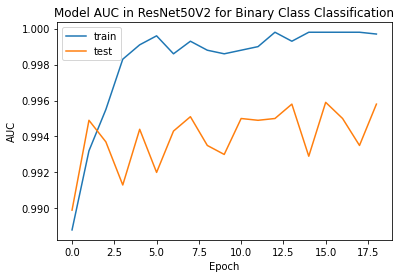

In [ ]:
import matplotlib.pyplot as plt
auc = [0.9888,0.9932,0.9955,0.9983,0.9991,0.9996,0.9986,0.9993,0.9988,0.9986,0.9988,0.9990,0.9998,0.9993,0.9998,0.9998,0.9998,0.9998,0.9997]
val_auc = [0.9899,0.9949,0.9937,0.9913,0.9944,0.9920,0.9943,0.9951,0.9935,0.9930,0.9950,0.9949,0.9950,0.9958,0.9929,0.9959,0.9950,0.9935,0.9958]
plt.title('Model AUC in ResNet50V2 for Binary Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()


In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
Epochs = 18
for i in range(Epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy
       1   0.101817 	   0.984193 	   0.080633 	   0.989583
       2   0.064643 	   0.992878 	   0.132330 	   0.989583
       3   0.028090 	   0.996526 	   0.133481 	   0.990972
       4   0.009468 	   0.998437 	   0.111474 	   0.991667
       5   0.011559 	   0.998784 	   0.194926 	   0.990972
       6   0.016444 	   0.998437 	   0.148405 	   0.993750
       7   0.008971 	   0.998089 	   0.150798 	   0.992361
       8   0.019305 	   0.998089 	   0.156402 	   0.993056
       9   0.012860 	   0.998263 	   0.226204 	   0.990278
      10   0.016181 	   0.998610 	   0.163341 	   0.995139
      11   0.012206 	   0.997916 	   0.144990 	   0.993750
      12   0.002075 	   0.999479 	   0.157696 	   0.993056
      13   0.009513 	   0.998958 	   0.138242 	   0.994444
      14   0.003563 	   0.998958 	   0.176632 	   0.993056
      15   0.001813 	   0.999653 	   0.173771 	   0.995833
      16   0.001887 	   0.999653 	   0.22190

In [ ]:
score = top_model.evaluate(validation_generator)
f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print("\n","Loss: ", score[0],"\n", "Accuracy: ", score[1],"\n", "Precision: ",score[2], "\n","Recall: ",score[3],"\n","F1-Score: ",f1_score,"\n","AUC: ",score[4])

46/46 [==============================] - 31s 673ms/step - loss: 0.2398 - accuracy: 0.9910 - precision: 0.9896 - recall: 0.9935 - auc: 0.9922

 Loss:  0.2397860735654831 
 Accuracy:  0.9910096526145935 
 Precision:  0.9895833134651184 
 Recall:  0.9934640526771545 
 F1-Score:  0.9915198858504828 
 AUC:  0.9922153949737549


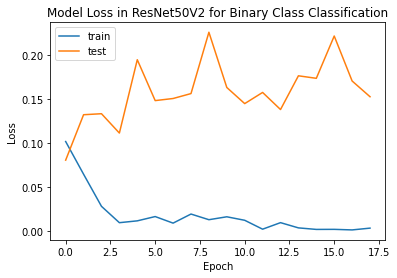

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Loss in ResNet50V2 for Binary Class Classification')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/LossNASNetMobile.png')
pyplot.legend()
pyplot.show()

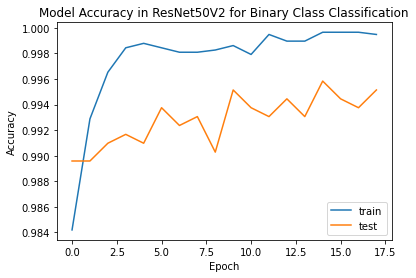

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Accuracy in ResNet50V2 for Binary Class Classification')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AccuracyNASNetMobile.png')
pyplot.legend()
pyplot.show()